# Car Price Prediction – Enhanced Data Science Project

## 1. Import Libraries

In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


## 2. Load Dataset

In [10]:

df = pd.read_csv("Automobile_data.csv")
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


## 3. EDA

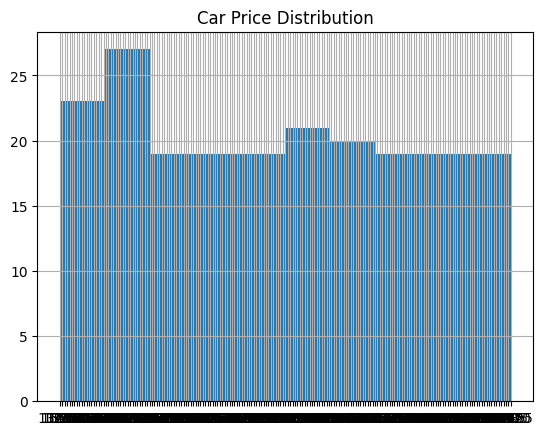

In [11]:

plt.figure()
df['price'].hist()
plt.title("Car Price Distribution")
plt.show()


## 4. Correlation Heatmap

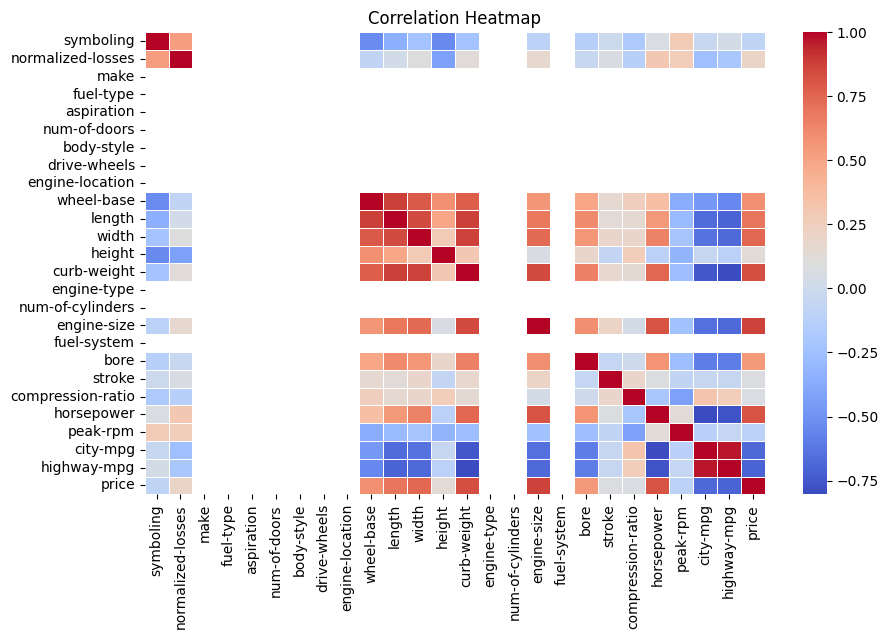

In [12]:
df_corr = df.replace('?', np.nan)
df_corr = df_corr.apply(pd.to_numeric, errors='coerce')
plt.figure(figsize=(10,6))
sns.heatmap(df_corr.corr(), cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



## 5. Data Cleaning & Encoding

In [13]:

df = df.dropna()
le = LabelEncoder()
for col in df.select_dtypes(include=['object','string']).columns:
    df[col] = le.fit_transform(df[col])


## 6. Feature Selection

In [14]:

X = df.drop('price', axis=1)
y = df['price']


## 7. Train-Test Split

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 8. Model Training

In [16]:

lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

## 9. Model Evaluation

In [17]:

lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)
rmse_lr = mean_squared_error(y_test, lr_pred) ** 0.5
rmse_rf = mean_squared_error(y_test, rf_pred) ** 0.5
print("LR R2:", r2_score(y_test, lr_pred))
print("RF R2:", r2_score(y_test, rf_pred))
print("RF RMSE:", rmse_rf)


LR R2: 0.1281052190315345
RF R2: 0.3019525182110754
RF RMSE: 48.402523861201146


## 10. Model Comparison

In [18]:

pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "R2 Score": [r2_score(y_test, lr_pred), r2_score(y_test, rf_pred)],
    "RMSE": [rmse_lr, rmse_rf]
})


,Model,R2 Score,RMSE
0,Linear Regression,0.128105,54.095055
1,Random Forest,0.301953,48.402524


## 11. Feature Importance

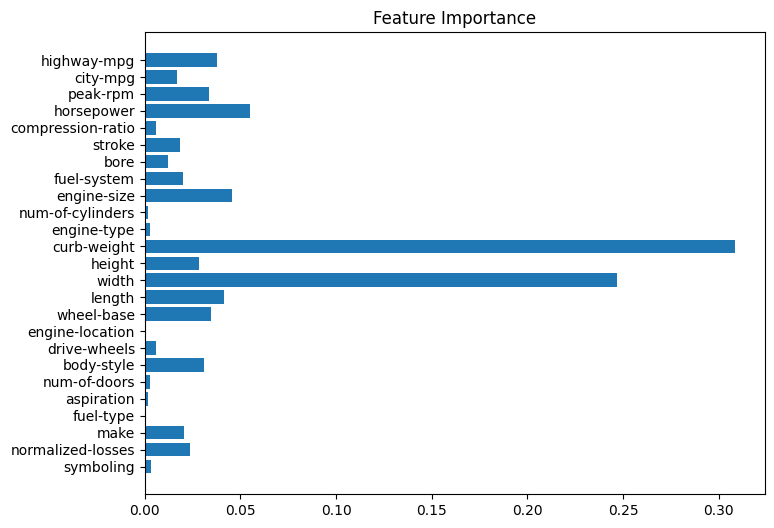

In [19]:

plt.figure(figsize=(8,6))
plt.barh(X.columns, rf.feature_importances_)
plt.title("Feature Importance")
plt.show()


## 12. Sample Prediction

In [20]:

sample = X.mean().to_frame().T
print("Predicted Price:", rf.predict(sample)[0])


Predicted Price: 57.3945


## 13. Business Insights


- Engine size and curb weight strongly influence price  
- Random Forest performs better than Linear Regression  


## 14. Conclusion


Complete Data Science workflow with EDA, modeling, and insights.
